In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig
import seaborn
import networkx as nx
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns
from matplotlib.font_manager import FontProperties  # FontProperties
import warnings
warnings.filterwarnings("ignore")

In [2]:
path1 = r'E:\netData\APS\1 Authors\APS_authors2.0.zip'

df = pd.read_csv(path1)

df['type'] = df['type'].map(dict(zip(['获奖学者' , '非获奖学者'] , ['laureate' , 'non-laureate'])))

In [3]:
df['I C'] = df['C'] - df['E C']

# IR

In [5]:
def get_IR(threshold , v , f1):
    k = int(np.floor(len(f1)*threshold))
    totallau = len(f1[f1['type']=='laureate'])
    f2 = f1.sort_values([v],ascending= False)
    f21 = f2.head(k)
    d = len(f21[f21['type']=='laureate'])/totallau
    return d

In [14]:
vlst = ['pub_num','h','C','E C','E h','I C']
thresholdlst = [0.01*i for i in range(1,40)]
c = ['#138D75','#CB4335','#3498DB','#1A5276','#7B241C','#283747']
markers = ['p','X','o','*','s','p','D','v']

labellst = ['Pub','h-index','Citation','EC','Eh','IC']

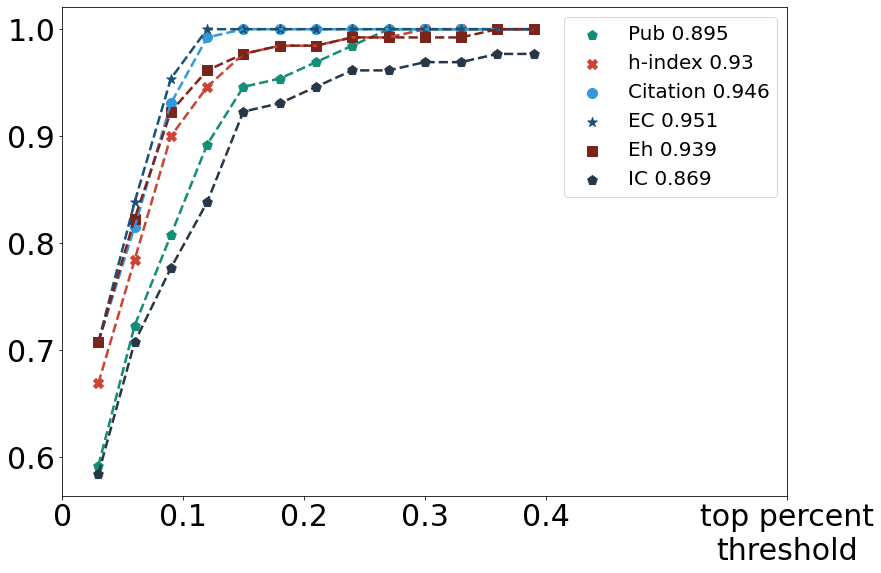

In [15]:
f, ax = plt.subplots(figsize=(13, 9))
for i in range(len(vlst)):
    v = vlst[i]
    label = labellst[i]
    d = np.array([get_IR(threshold , v , df) for threshold in thresholdlst])
    plt.scatter(thresholdlst[2::3],d[2::3],s=100,marker=markers[i],c = c[i],edgecolors=c[i],alpha=1,label=label +" "+ str(np.round(np.mean(d),3)))
    plt.plot(thresholdlst[2::3],d[2::3],linestyle = '--', linewidth=2.5,alpha=1,color=c[i])
plt.xlim(0,0.6)
plt.xticks([0,0.1,0.2,0.3,0.4,0.6],[0,0.1,0.2,0.3,0.4,'top percent\nthreshold'],fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize =20)
plt.savefig(r"F:\A J YANG PAPER\APS analysis\Sciento EC Eh\fig\fig 6 7\IR.pdf",bbox_inches = 'tight')

# AR

In [4]:
def get_AR( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['type']=='laureate'].index
    d = sum(lst)/len(lst)
    return d

def get_AR2( v , f1):
    f2 = f1.sort_values([v],ascending= False)
    f2.index = range(len(f2))
    lst = f2[f2['type']=='laureate'].index
    d = sum(lst)/(lst[-1] - lst[0])/len(lst)
    return d

In [5]:
vlst = ['pub_num','h','C','E C','E h','I C']
c = ['#138D75','#CB4335','#3498DB','#1A5276','#7B241C','#283747']
markers = ['p','X','o','*','s','p','D','v']

labellst = ['Pub','h-index','Citation','EC','Eh','IC']
y_pos = [1,2,3,4,5,6,]

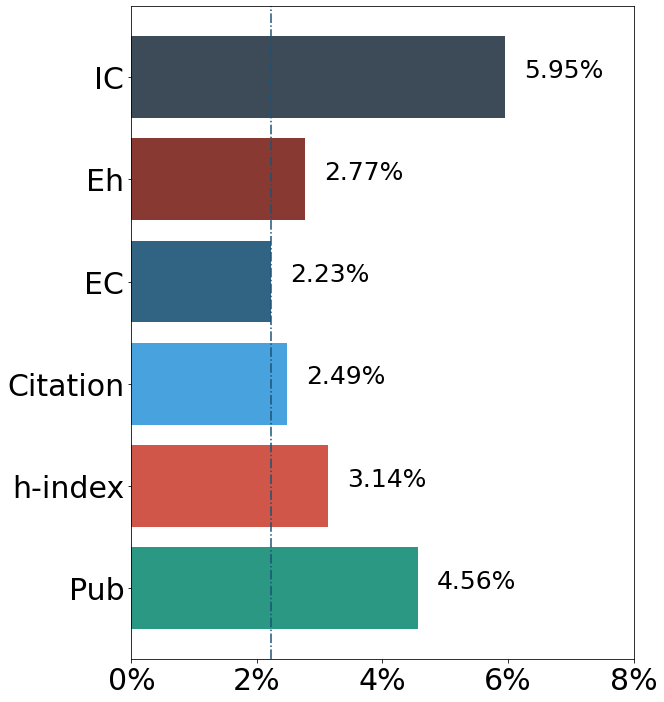

In [11]:
f, ax = plt.subplots(figsize=(9, 12))
dlst = [get_AR(v, df) for v in vlst]
dlst_percent = [100 * x / len(df) for x in dlst]  # convert to percentage and normalize to 100%
xticks_percent = [int(round(x)) for x in np.linspace(0, 8, 5)]  # calculate x-axis ticks as percentage values

plt.axvline(x=min(dlst_percent), ls='-.', c='#1A5276')
plt.barh(y_pos, dlst_percent, align='center', color=c, alpha=0.9, capsize=10)

for x, v in enumerate(dlst_percent):
    plt.text(v + 0.3, x + 1, str(round(v, 2)) + "%", color='black', fontsize=25)

plt.xlim(0,8)
plt.yticks(y_pos, ['Pub','h-index','Citation','EC','Eh','IC'],
           fontsize=30)
plt.xticks(xticks_percent, [str(x) + "%" for x in xticks_percent], fontsize=30)  # set x-axis ticks as percentage values
# plt.title(titles[i],fontsize =40)
plt.savefig(r"G:\A J YANG PAPER\APS analysis\Sciento EC Eh\fig\fig 6 7\AR1.pdf",bbox_inches = 'tight')

In [6]:
[get_AR(v, df) for v in vlst]

[10681.207692307693,
 7347.861538461539,
 5818.107692307693,
 5215.261538461538,
 6486.2,
 13932.030769230769]

In [7]:
[get_AR2(v, df) for v in vlst]

[0.17716383632953545,
 0.11078904058111874,
 0.20597988006470622,
 0.20027117001887554,
 0.07845418808587844,
 0.06456769939487968]